In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Assignment 05

## Exercise 05.1

### 1. Implementation of the Neural Network

Goal of this exercise is to train a neural network with two inputs $(i_1,i_2)$, a single output $o_1$ and a hidden layer with three neurons $(h_1, h_2, h_3)$ to act as a logical gate. We can choose from `and`, `or`, `xor` and `nand`. I will first train the network on the `and` gate. 

Initializing the weights and defining the activation function and its derivative.

In [256]:
w = [np.array([[0.3, 0.45], [0.55, 0.50], [0.2, 0.35]]), np.array([0.15, 0.4, 0.25])]
b = [np.array([0.6, 0.7, 0.85]), 0.05]
inpt = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
output_and = np.array([0, 0, 0, 1])

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def der_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

def feed_forward(weights, biases, inpt):
    hidden_net = np.dot(inpt, weights[0].T) + b[0]
    hidden_out = sigmoid(hidden_net)
    out_net = np.dot(hidden_out, weights[1]) + biases[1]
    out_out = sigmoid(out_net)
    return hidden_net, hidden_out, out_net, out_out

def MSE(out_pred, outpt):
    return np.mean(np.power(out_pred - outpt, 2))

def der_MSE(out_pred, outpt):
    return 0.5 * (out_pred - outpt)

def back_propagation(weights, biases, inpt, outpt, learning_rate):
    new_weights = [np.zeros((3, 2)), np.zeros(3)]
    gradient = [np.zeros((3, 2)), np.zeros(3)]
    hidden_net, hidden_out, out_net, out_out = feed_forward(weights, biases, inpt)
    gradient[0] = np.dot((weights[1].T * der_sigmoid(hidden_net)).T * der_MSE(out_out, outpt) * der_sigmoid(out_net), inpt)
    gradient[1] = np.dot(hidden_out.T, der_MSE(out_out, outpt) * der_sigmoid(out_net))
    new_weights[0] = weights[0] - learning_rate * gradient[0]
    new_weights[1] = weights[1] - learning_rate * gradient[1]
    return new_weights, gradient

def training(init_weights, init_biases, inpt, outpt, learning_rate, N_epochs):
    new_weights = init_weights.copy()
    MSEs = []
    for s in range(N_epochs):
        new_weights = back_propagation(new_weights, init_biases, inpt, outpt, learning_rate)[0]
        MSEs.append(MSE(feed_forward(new_weights, init_biases, inpt)[3], outpt))
    return new_weights, MSEs

In [252]:
print('MSE before one FF and BP step = ', MSE(feed_forward(w, b, inpt)[3], output_and))
print('MSE after one FF and BP step = ', MSE(feed_forward(back_propagation(w, b, inpt, output_and, 0.5)[0], b, inpt)[3], output_and))
print('MSE reduced by ', 1 - MSE(feed_forward(back_propagation(w, b, inpt, output_and, 0.5)[0], b, inpt)[3], output_and)/ MSE(feed_forward(w, b, inpt)[3], output_and), '%')
print('The computation takes around ~ 0.5ms')

MSE before one FF and BP step =  0.34739250913813546
MSE after one FF and BP step =  0.3222283501261736
MSE reduced by  0.07243725281927627 %
The computation takes around ~ 0.5ms


In [265]:
start = time.time()
back_propagation(w, b, inpt, output_and, 0.5)
end = time.time()
print("One such update step takes around ", end - start, "seconds")

One such update step takes around  0.0001819133758544922 seconds


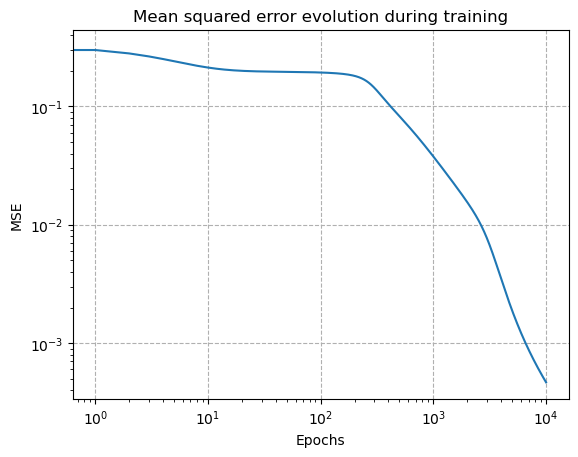

In [263]:
fig = plt.figure()
ax = plt.gca()
ax.plot(range(10000), training(w, b, inpt, output_and, 0.5, 10000)[1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE')
ax.set_title('Mean squared error evolution during training')
ax.grid(ls='--')

Let's now very with the learning time and plot the results:

In [282]:
learning_rates = [0.2, 0.4, 0.5, 0.6, 0.8, 1.0, 5.0, 20.0, 30.0, 50.0]
training_errors = [training(w, b, inpt, output_and, rate, 10000)[1] for rate in learning_rates]

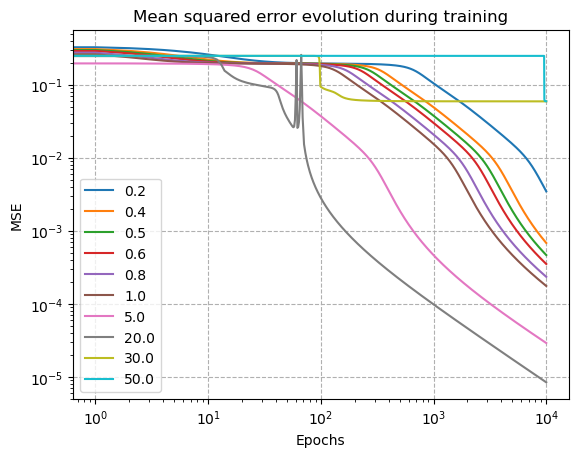

In [283]:
fig = plt.figure()
ax = plt.gca()
for i, eta in enumerate(learning_rates):
    ax.plot(range(10000), training_errors[i], label=f"{eta}")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE')
ax.set_title('Mean squared error evolution during training')
ax.legend()
ax.grid(ls='--')

plt.show()

A smaller step size obviously slows the convergence but seems rather stable. Instead, if the learning rate is too large, the learning can actually fail.

## Exercise 05.2 Transfer Learning

In [290]:
output_xor = np.array([0, 1, 1, 0])
output_xand = np.array([1, 1, 1, 0])
output_or = np.array([0, 1, 1, 1])
trained_weights, and_MSE = training(w, b, inpt, output_and, 5.0, 10000)

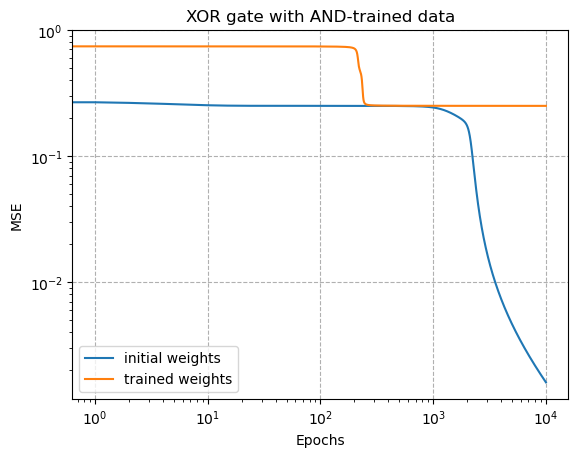

In [296]:
xor_init_weights = training(w, b, inpt, output_xor, 0.5, 10000)
xor_trained_weights = training(trained_weights, b, inpt, output_xor, 0.5, 10000)
fig = plt.figure()
ax = plt.gca()
ax.plot(range(10000), xor_init_weights[1], label="initial weights")
ax.plot(range(10000), xor_trained_weights[1], label="trained weights")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE')
ax.set_title('XOR gate with AND-trained data')
ax.legend(loc='lower left')
ax.grid(ls='--')

plt.show()


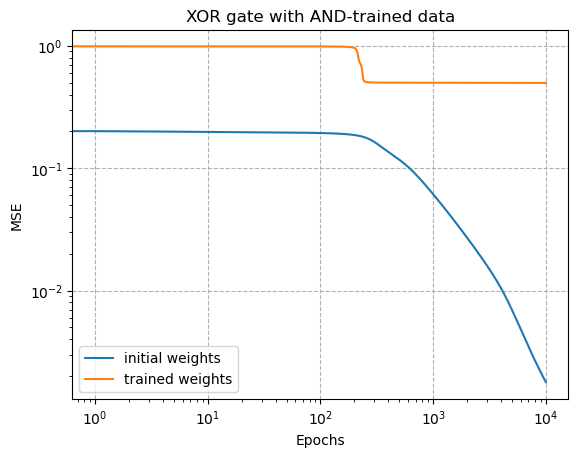

In [295]:
xand_init_weights = training(w, b, inpt, output_xand, 0.5, 10000)
xand_trained_weights = training(trained_weights, b, inpt, output_xand, 0.5, 10000)
fig = plt.figure()
ax = plt.gca()
ax.plot(range(10000), xand_init_weights[1], label="initial weights")
ax.plot(range(10000), xand_trained_weights[1], label="trained weights")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE')
ax.set_title('XOR gate with AND-trained data')
ax.legend(loc='lower left')
ax.grid(ls='--')

plt.show()


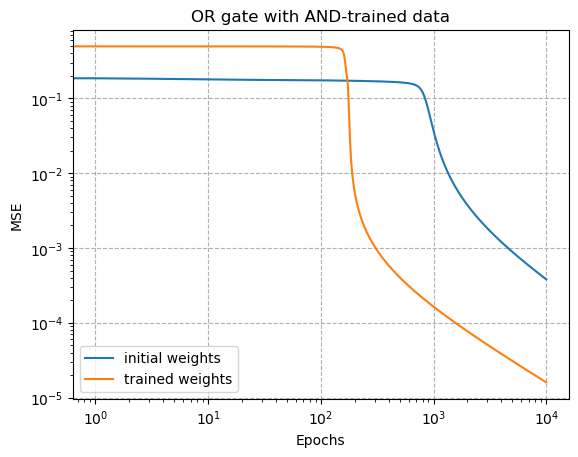

In [298]:
or_init_weights = training(w, b, inpt, output_or, 0.5, 10000)
or_trained_weights = training(trained_weights, b, inpt, output_or, 0.5, 10000)
fig = plt.figure()
ax = plt.gca()
ax.plot(range(10000), or_init_weights[1], label="initial weights")
ax.plot(range(10000), or_trained_weights[1], label="trained weights")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE')
ax.set_title('OR gate with AND-trained data')
ax.legend(loc='lower left')
ax.grid(ls='--')

plt.show()

Only for the `OR` gate, we find that the learning gets better with pre-trained data from the `AND` gate. 